# Project: Students Percentage Prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Exploratory</a></li>
    <ul>
    <li><a href="#prep">Preparing the data</a></li>
    <li><a href="#train">Training the Algorithm</a></li>
    <li><a href="#pred">Making Predictions</a></li>
    <li><a href="#eval">Evaluating the model</a></li>
    <li><a href="#stat">Statistical Model</a></li>
    </ul>
<li><a href="#conc">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project, We will use the Python Scikit-Learn library for machine learning to implement regression functions.
> This dataset collects information about percentage of student based on the number of study hours.

> **We will try to predect the percentage of marks that a student is expected to score based upon the number of hours they studied.**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, you will load in the data, check for cleanliness, and then trim and clean the dataset before implement it in the model.

In [2]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


> First, let's inspect data type and looking for missing data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


> We don't have missing values and we don't need to change the columns data type.

> Let's check if there are any duplicates in the data.

In [4]:
df.duplicated().sum()

0

>There is no identical duplicates rows on the data.

> Now, We want to see some statistics about the data.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


>+ The average study hours is 5 hours.
>+ The study hours is between 1 hour and 9 hours.
>+ The average student mark persent is 51.4%. 
>+ The mark persent is between 17 and 95.

> In my opinion, we don't have outliers.

> We don't need to clean the dataset and we can use it to make a model.

<a id='eda'></a>
## Data Exploratory

> Let's try to visualize the data to see if there are any relationship between the columns.

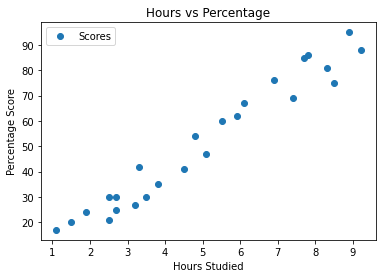

In [6]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score');

> There is a positive linear relationship between studys hours and Percentage Score.

<a id='prep'></a>
> ### Preparing the data

> First, We need to divide the data into inputs and outputs.

In [7]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

> Then, We need to split this data into training and test sets.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)

<a id='train'></a>
> ### Training the Algorithm

> Now, It's the time to train our algorithm.

In [9]:
model = LinearRegression()  
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.944131972730691

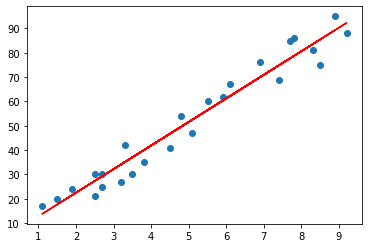

In [10]:
# Plotting the regression line
line = model.predict(X)

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color='Red');

<a id='pred'></a>
> ### Making Predictions

> After traning our algorithm, Let;s use it to predict some results. 

In [11]:
print(X_test) # Testing data - In Hours
Y_pred = model.predict(X_test) # Predicting the scores

[[1.1]
 [2.7]
 [5.9]
 [2.5]
 [2.7]]


In [12]:
score = explained_variance_score(Y_test, Y_pred)
score

0.9478790785088366

In [13]:
# Comparing Actual vs Predicted
Pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
Pred 

,Actual,Predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


> Let's show the prediction score if a student studies for **9.25 hrs/day**.

In [14]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.74757780643364


<a id='eval'></a>
> ### Evaluating the model

> Now, Let's evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

> We have chosen the mean absolute error method.

In [17]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 3.256972083783501


<a id='stat'></a>
> ### Statistical Model

> We can also predict the results using statistical methods

In [16]:
df['intercept'] = 1

lm = sm.OLS(df['Scores'], df[['intercept', 'Hours']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           9.13e-17
Time:                        14:18:01   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>+ The R-squared is 0.953

<a id='conc'></a>
## Conclusion

> We can see that our model has a great performance as we can see the **Mean Absolute Error is 3.26** and **The R-squared is close to 1** which a good indicator that it's a good model.

> We can also conclude that if **the student studies for 9.25 hrs/day, then according to our model they should score 92.75%**